In [2]:
import numpy as np 
import pandas as pd 
import keras 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
import seaborn as sns 
import nltk 
import re 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string 
# nltk.download('stopwords')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Conv2D , Embedding , Dense , LSTM , activation , Dropout , Flatten , GlobalMaxPooling1D

from keras.utils.data_utils import pad_sequences    

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.shape

(50000, 2)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

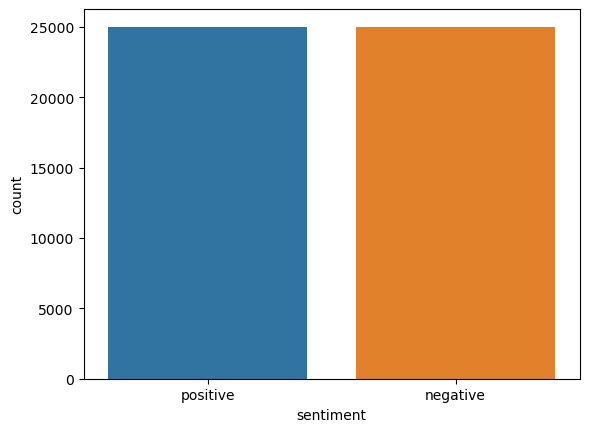

In [7]:
sns.countplot(x = 'sentiment'  , data= df)
plt.show()

In [8]:
tage_re = re.compile(r'<[^>]+>')

In [9]:
def process(sen):
    sentence = tage_re.sub(' ',sen)
    
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    sentence = re.sub(r"\s+[a-zA-Z]\s+" , ' ', sentence)
    
    sentence = re.sub(r"\s+" , ' ', sentence)
    
    return sentence 

In [10]:
# def process_test(text) : 
# # remove all stopwords,punctuations and return clean words 
#     sentence = [char for char in text if char not in string.punctuation]
#     sentence = ''.join(sentence)
    
#     clean_words = [word for word in sentence.split() if word.lower() not in stopwords.words('english')]
#     return clean_words

In [11]:
review = []
sentence = list(df['review'])
for sen in sentence : 
    review.append(process(sen))

In [12]:
review[2]

'I thought this was wonderful way to spend time on too hot summer weekend sitting in the air conditioned theater and watching light hearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point Risk Addiction thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love This was the most d laughed at one of Woody comedies in years dare say decade While ve never been impressed with Scarlet Johanson in this she managed to tone down her sexy image and jumped right into average but spirited young woman This may not be the crown jewel of his career but it was wittier than Devil Wears Prada and more interesting than Superman great comedy to go see with friends '

In [13]:
review[4]

'Petter Mattei Love in the Time of Money is visually stunning film to watch Mr Mattei offers us vivid portrait about human relations This is movie that seems to be telling us what money power and success do to people in the different situations we encounter This being variation on the Arthur Schnitzler play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter The acting is good under

In [24]:
converted = df['sentiment']
converted = np.array(list(map(lambda x: 1 if x=='positive' else 0 , converted)))

In [35]:
review_train , review_test , label_train , label_test = train_test_split(review , converted , test_size=0.2)


In [36]:
print(review_test[3])
print(len(review_test),'    ' , len(review_test[3]))
print(review_train[3])
print(len(review_train),'    ' , len(review_train[3]))

This film is one of the classics of cinema history It was not made to please modern audiences so some people nowadays may think it is creaky or stilted found it to be absorbing throughout Cherkassov has exactly the right presence to play Alexander Nevskyi just as he did when he played Ivan Groznyi Ivan the Terrible several years later The music was beautiful My one complaint was the poor soundtrack that was quite garbled Although only know little Russian it would have been nice to be able to pick out more words rather than having to rely almost on the subtitles was watching this on an old videotape from the library though Perhaps by now DVD version exists on which the sound has been enhanced would like to know whether the actors were using archaic Russian or even Old Church Slavonic when they were speaking The subtitles were strangely worded and it hard for me to tell whether this was to reflect an older manner of speaking or whether the subtitles were just somewhat poorly done 
10000 

In [37]:
tokenizer = Tokenizer(num_words=5000 )
tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)
print(tokenizer.document_count)

40000


In [38]:
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('of', 3), ('to', 4), ('is', 5), ('it', 6), ('in', 7), ('this', 8), ('that', 9), ('was', 10), ('as', 11), ('movie', 12), ('with', 13), ('for', 14), ('but', 15), ('film', 16), ('you', 17), ('on', 18), ('not', 19), ('he', 20), ('are', 21), ('his', 22), ('have', 23), ('one', 24), ('be', 25), ('all', 26), ('at', 27), ('they', 28), ('by', 29), ('an', 30), ('who', 31), ('so', 32), ('from', 33), ('like', 34), ('there', 35), ('or', 36), ('just', 37), ('her', 38), ('out', 39), ('about', 40), ('if', 41), ('has', 42), ('what', 43), ('some', 44), ('good', 45), ('can', 46), ('more', 47), ('when', 48), ('very', 49), ('she', 50), ('up', 51), ('no', 52), ('time', 53), ('my', 54), ('even', 55), ('would', 56), ('which', 57), ('story', 58), ('really', 59), ('see', 60), ('only', 61), ('their', 62), ('had', 63), ('me', 64), ('well', 65), ('we', 66), ('were', 67), ('than', 68), ('much', 69), ('get', 70), ('bad', 71), ('been', 72), ('other', 73), ('do', 74), ('people', 75)

In [40]:
print(review_test[3])
print(review_test[3][99])
len(review_test[3])

[8, 16, 5, 24, 3, 1, 2081, 3, 426, 478, 6, 10, 19, 86, 4, 561, 670, 1184, 32, 44, 75, 2854, 200, 98, 6, 5, 36, 4261, 250, 6, 4, 25, 469, 42, 615, 1, 201, 1299, 4, 282, 3507, 37, 11, 20, 111, 48, 20, 248, 1, 371, 447, 152, 304, 1, 202, 10, 303, 54, 24, 3805, 10, 1, 331, 714, 9, 10, 180, 253, 61, 115, 116, 1519, 6, 56, 23, 72, 324, 4, 25, 466, 4, 1126, 39, 47, 659, 244, 68, 259, 4, 4870, 208, 18, 1, 2302, 10, 145, 8, 18, 30, 156, 33, 1, 3256, 153, 382, 29, 144, 256, 313, 2930, 18, 57, 1, 434, 42, 72, 56, 34, 4, 115, 707, 1, 149, 67, 791, 1519, 36, 55, 156, 1500, 48, 28, 67, 1359, 1, 2302, 67, 2997, 2, 6, 247, 14, 64, 4, 370, 707, 8, 10, 4, 4215, 30, 982, 1400, 3, 1359, 36, 707, 1, 2302, 67, 37, 656, 854, 213]
156


164

In [41]:
print(len(review_train[3]))
print(tokenizer.document_count)
print(len(tokenizer.word_index))

57
40000
90851


In [42]:
vocab_size = len(tokenizer.word_index) + 1 
vocab_size

90852

In [43]:
maxlen = 100 

review_train = pad_sequences(review_train , padding = 'post' , maxlen = maxlen)
review_test = pad_sequences(review_test , padding = 'post' , maxlen = maxlen)


In [44]:
len(review_train)

40000

In [45]:
print(review_test[3])
print(review_test[3][99])
len(review_test[3])

[   9   10  180  253   61  115  116 1519    6   56   23   72  324    4
   25  466    4 1126   39   47  659  244   68  259    4 4870  208   18
    1 2302   10  145    8   18   30  156   33    1 3256  153  382   29
  144  256  313 2930   18   57    1  434   42   72   56   34    4  115
  707    1  149   67  791 1519   36   55  156 1500   48   28   67 1359
    1 2302   67 2997    2    6  247   14   64    4  370  707    8   10
    4 4215   30  982 1400    3 1359   36  707    1 2302   67   37  656
  854  213]
213


100

In [46]:
embedding_dic = dict()
glove_file = open('glove.6B.100d.txt' , encoding= 'utf8')

for line in glove_file : 
    records = line.split()
    word = records[0]
    vector_dim = np.asarray(records[1:] , dtype = 'float32')
    embedding_dic[word] = vector_dim
glove_file.close()

In [48]:
len(embedding_dic)

400000

In [49]:
embedding_dic

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [50]:
embedding_matrix = np.zeros((vocab_size , 100))
embedding_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
for word , index in tokenizer.word_index.items():
    embedding_vec = embedding_dic.get(word)
    if embedding_vec is not None :
        embedding_matrix[index] = embedding_vec

In [52]:
embedding_vec

array([ 0.4997   , -0.45157  , -0.60043  ,  0.012592 , -0.36548  ,
        0.22578  , -0.33326  , -0.23092  ,  0.027808 , -0.20929  ,
       -0.25986  , -0.10082  ,  0.39492  , -0.20072  , -0.043208 ,
       -0.24872  , -0.33765  ,  0.069693 ,  0.023724 , -0.34186  ,
        0.1185   , -0.34554  ,  0.17577  , -0.28138  ,  0.47577  ,
        0.089033 , -0.021751 ,  0.4336   ,  0.21363  , -0.0080557,
       -0.050469 ,  0.68085  , -0.51515  ,  0.626    ,  0.19961  ,
       -0.25518  , -0.56688  , -0.30355  , -0.25724  ,  0.056695 ,
       -0.098414 , -0.04494  ,  0.11455  ,  0.6553   , -0.22343  ,
       -0.071531 ,  0.53261  , -0.31913  , -0.0037106, -0.3901   ,
        0.77238  , -0.15289  , -0.17749  ,  0.29374  , -0.16368  ,
        0.44337  ,  0.15184  ,  0.11312  , -0.50195  , -0.61692  ,
        0.059749 , -0.5306   ,  0.27583  ,  0.14962  , -0.78701  ,
       -0.33039  , -0.068191 , -0.044655 , -0.68066  ,  0.41956  ,
        0.12773  ,  0.16522  ,  0.077958 , -0.027922 ,  0.3816

In [53]:
model = Sequential()

model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], input_length=maxlen ,  trainable = False ))

In [54]:
model.add(LSTM(128))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9085200   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,202,577
Trainable params: 117,377
Non-trainable params: 9,085,200
_________________________________________________________________


In [55]:
model.compile('adam' , loss= tf.losses.binary_crossentropy, metrics = ['accuracy'])

In [57]:
history = model.fit(review_train , label_train , batch_size=128 , epochs= 6 , verbose= 1 , validation_split= 0.2)

score = model.evaluate(review_test ,label_test , verbose = 1)

Epoch 1/6
250/250 [==============================] - 100s 401ms/step - loss: 0.3083 - accuracy: 0.8664 - val_loss: 0.3366 - val_accuracy: 0.8533
Epoch 2/6
250/250 [==============================] - 99s 396ms/step - loss: 0.2877 - accuracy: 0.8772 - val_loss: 0.3547 - val_accuracy: 0.8440
Epoch 3/6
250/250 [==============================] - 98s 393ms/step - loss: 0.2714 - accuracy: 0.8836 - val_loss: 0.3484 - val_accuracy: 0.8476
Epoch 4/6
250/250 [==============================] - 99s 397ms/step - loss: 0.2550 - accuracy: 0.8920 - val_loss: 0.3414 - val_accuracy: 0.8587
Epoch 5/6
250/250 [==============================] - 12747s 51s/step - loss: 0.2353 - accuracy: 0.8998 - val_loss: 0.3355 - val_accuracy: 0.8500
Epoch 6/6
313/313 [==============================] - 8s 24ms/step - loss: 0.3956 - accuracy: 0.8467


In [24]:
print('Loss score : ' , score[0])
print('Test Accuracy : ' , score[1])

Test score :  0.3469107151031494
Test Accuracy :  0.8421000242233276


In [ ]:
keras.models.save_model(model , 'Computer Vision/RNN')

INFO:tensorflow:Assets written to: Computer Vision/RNN\assets


INFO:tensorflow:Assets written to: Computer Vision/RNN\assets


In [26]:
gg = keras.models.load_model('Computer Vision/RNN')

In [31]:
gg.evaluate(review_test ,label_test , verbose = 1)
predict(review_test[:3])

1/1 [==============================] - 0s 58ms/step


array([[0.01033295],
       [0.4278264 ],
       [0.9549613 ]], dtype=float32)

In [32]:
model1 = keras.models.load_model('Computer Vision/RNN')
model1.evaluate(review_test ,label_test , verbose = 1)

array([0, 1, 1])